# Introduction to One-Dimensional Lagrange Interpolation

[Next Notebook Piecewise interpolation](./NB 2 LAGRANGE1D.ipynb)

## Introduction

In a broad sense the finite element method is nothing else than an approximation technique for solutions to boundary and initial value problems. The approximation of solutions is achieved primarily using interpolation techniques. In this notebook we will discuss some fundamental and basic aspects of interpolation theory.

## Lagrange Interpoaltion
The problem of interpolation is that of finding the value of a function $f(x)$ at an arbitrary point $x \in \left[ {{x_1},{x_n}} \right]$, provided we have known discrete values of the function inside the domain. According to Lagrange interpolationtheoremthe approximation $\hat f(x)$  to the function $f(x)$ is built like:

\begin{equation}
\hat f(x)={L^I}(x)f^I
\end{equation}

where $L^I$ is the $I$-th Lagrange Polynomial of order $n-1$ and $f^1, f^2,,...,f^n$ are the $n$ known values of the function. The $I$-th Lagrange polynomial is given by the reursive expression:

\begin{equation}
{L^I}(x)=\prod_{J=1, J \ne I}^{n}{\frac{{\left( {x - {x^J}} \right)}}{{\left( {{x^I} - {x^J}} \right)}}} 
\end{equation}

## Example
Formulate an interpolation scheme to find a value of the function:

 $ f(x)=x^3+4x^2-10 $

at an arbitrary point $x$ in the interval $\left[ {{-1},{1}} \right]$ assuming we know the exact value of the function at points $x=-1.0$, $x=1.0$ and $x=0.0.$

Let us first import some useful Python libraries.

* `numpy` is a library to perform matric operations analogous to MATLAB.
* `matplotlib` is plotting library.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import sympy as sym

### Lagrange interpolation polynomials

First, we define a Python function (or subroutine) to generate the Lagrange polynomial of order $order$ associated to the point $I$. The function will be later invoked from within the main program. The function will be termed LagrangPoly(). In Python we declare a function by the keyword def followed by the function name and its arguments enclosed in barckets. Upon execution the function returns whatever is inlcuded following the keywrod return at the end of the definition.

In [2]:
def LagrangPoly(x,order,i,xi=None): 
    if xi==None:
        xi=sym.symbols('x:%d'%(order+1))
    index = list(range(order+1))
    index.pop(i)
    return sym.prod([(x-xi[j])/(xi[i]-xi[j]) for j in index])

The Lambda option (see sample notebook) is used to code  a fucntion like in calculus. That is the function $f(x)$ per se. In this case $ f(x)=x^3+4x^2-10 $.


**(Try different functions, increasing or decreasing the order to see how the interpolation scheme is more or less accurate)**.

In [3]:
fx = lambda x: x**3+4.0*x**2-10.0
#
npts = 200
yy = np.zeros((npts))          #Create arrays of length npoints to store x-y values
xx = np.linspace(-1, 1, npts)  #Assigns npts x-values between -1 and 1

With the function at hand we compute the (known) values ready to be used in the interpolation scheme. These values will be stored in the array fd():

In [4]:
fd = np.array([fx(-1.0), fx(1.0) ,fx(0.0)]) #These are just the dots in the figure,

Evaluate the function at the npoints and plot it:

<IPython.core.display.Javascript object>


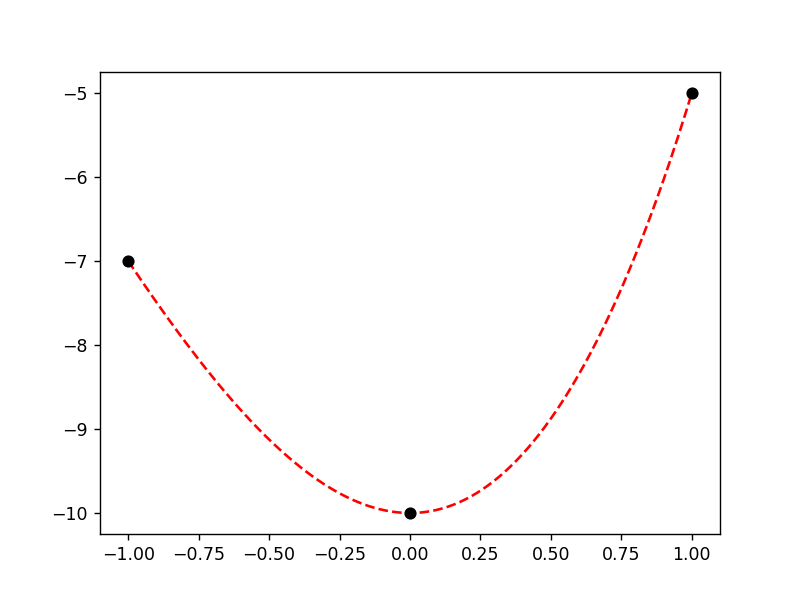

In [5]:
plt.figure(0)
yy= fx(xx)       
plt.plot(xx, yy ,'r--')
plt.plot([-1, 1, 0], fd, 'ko')

### Lagrange Polynomials

Now, let us obtain the Lagrange polynomials invoking the function LagrangPoly()

In [6]:
x= sym.symbols('x')
pol = []       #Create an empty dynamic array
pol.append(sym.simplify(LagrangPoly(x, 2, 0, [-1,1,0])))  #Compute the first poly. and store it in pol[0]
pol.append(sym.simplify(LagrangPoly(x, 2, 1, [-1,1,0])))
pol.append(sym.simplify(LagrangPoly(x, 2, 2, [-1,1,0])))
print(pol)

[x*(x - 1)/2, x*(x + 1)/2, -x**2 + 1]


Plot the 3 resulting 2-nd order Lagrange polynomials. Notice that these satisfy the property $L^I(x^J)=\delta^{IJ}$.

**(Try adding more points to the interpolation domain and plot the resulting polynomials)**.

<IPython.core.display.Javascript object>


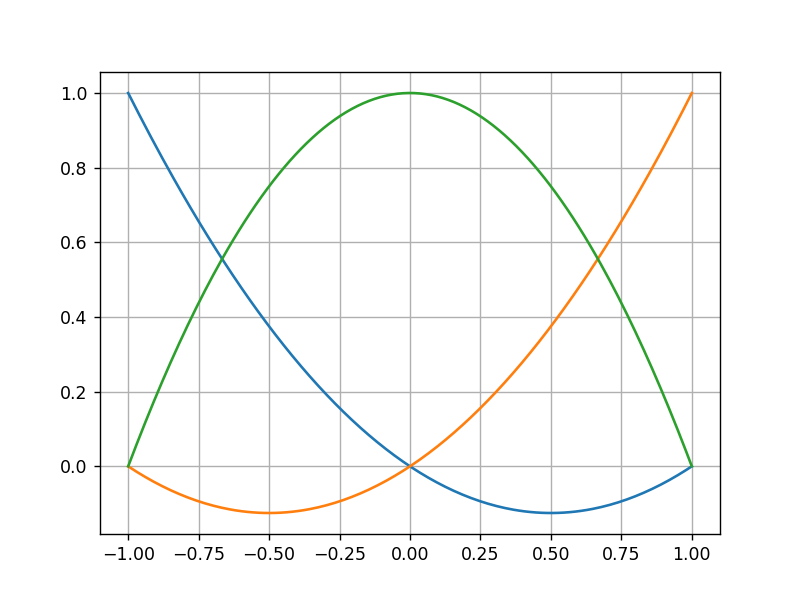

In [7]:
plt.figure(1)
plt.grid()
for k in range(3):
    for i in range(npts):
        yy[i] = pol[k].subs([(x, xx[i])])
    plt.plot(xx, yy)

### Interpolating polynomial $p(x)$ to approximate $f(x)$
Now we build the complete approximating polynomial $p(x)$ according to

$$p(x) = {L^0}(x)f({x^0}) + {L^1}(x)f({x^1}) +  {L^2}(x)f({x^2})$$


In [8]:
print(pol[0]*fd[0]+pol[1]*fd[1]+pol[2]*fd[2])

10.0*x**2 - 3.5*x*(x - 1) - 2.5*x*(x + 1) - 10.0


Due to the difference in order between $p(x)$ and the actual function $f(x)$ the interpolating polynomial does not completly matches the function although it captures the right values at the nodal points.

<IPython.core.display.Javascript object>


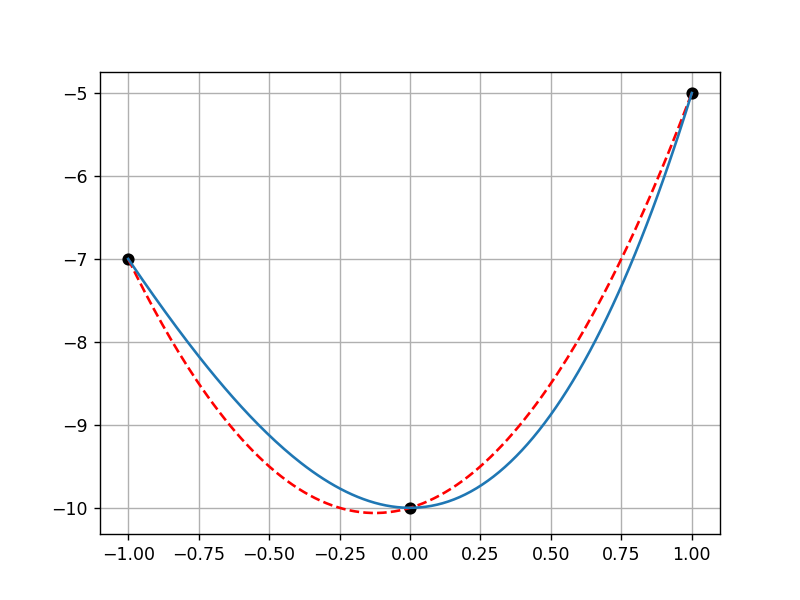

In [9]:
plt.figure(2)
plt.grid()
for i in range(npts):
    yy[i] = fd[0]*pol[0].subs([(x, xx[i])]) + fd[1]*pol[1].subs([(x, xx[i])]) \
            + fd[2]*pol[2].subs([(x, xx[i])])

zz = fx(xx)
plt.plot([-1, 1, 0], fd, 'ko')
plt.plot(xx, yy , 'r--')
plt.plot(xx, zz)

### First order derivative
The interpolating polynomial can nowbe used to approximate the first order derivative of the "unknown" function. The derivative is:

$$f'(x)=3x^2+8x$$

We use Lambda once again and store the derivatives at the nodes in the array fc()

In [10]:
fdx = lambda x: 3*x**2+8.0*x
fc = np.array([fdx(-1.0), fdx(1.0) ,fdx(0.0)])

The interpolatted derivatives is obtained according to:


\begin{equation}
p'(x) = \frac{dL^0(x)}{dx} f^0 + \frac{dL^1(x)}{dx}(x) f^1 + \frac{dL^2(x)}{dx} f^2
\end{equation}

[x - 1/2, x + 1/2, -2*x]
8.0*x + 1.0


<IPython.core.display.Javascript object>


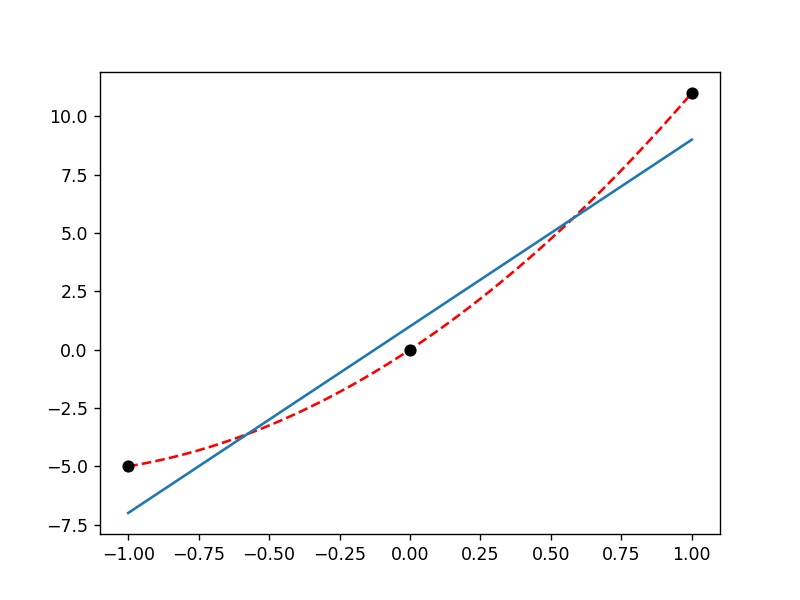

In [11]:
dpol = []
dpol.append(sym.diff(pol[0],x))
dpol.append(sym.diff(pol[1],x))
dpol.append(sym.diff(pol[2],x))
print(dpol)
print(dpol[0]*fd[0]+dpol[1]*fd[1]+dpol[2]*fd[2])
#
plt.figure(3)
yy= fdx(xx)
plt.plot(xx, yy ,'r--')
plt.plot([-1, 1, 0], fc, 'ko')
#
for i in range(npts):
    yy[i] = fd[0]*dpol[0].subs([(x, xx[i])]) + fd[1]*dpol[1].subs([(x, xx[i])])+ fd[2]*dpol[2].subs([(x, xx[i])]) 
plt.plot(xx, yy)

### Class activity
Using an independent script (or a new notebook) approximate the function $ f(x)=x^3+4x^2-10 $ using an interpolation scheme considering the additional nodal points $x^3 = -0.5$ and $x^4 = 0.5$

In [12]:
# This bit of code is a class added to make the title nice  (thanks to @lorenABarba )
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()